In [1]:
import warnings
warnings.filterwarnings(action='ignore')
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dexplot as dxp
from matplotlib.legend_handler import HandlerLine2D
import matplotlib.patches as mpatches

%matplotlib inline

In [7]:
from matplotlib.legend_handler import HandlerLine2D

In [8]:
import matplotlib.patches as mpatches

In [9]:
oly = pd.read_csv('../data/oly.csv', parse_dates=['Year'])
oly.info()
oly.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null datetime64[ns]
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(10)
memory usage: 31.0+ MB


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992-01-01,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012-01-01,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920-01-01,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900-01-01,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988-01-01,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [11]:
med = oly['Medal'].notna()
hasmed =oly[med]
hasmed.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900-01-01,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920-01-01,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920-01-01,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014-01-01,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948-01-01,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [12]:
med.value_counts(normalize =True)

False    0.853262
True     0.146738
Name: Medal, dtype: float64

In [13]:
pre= oly['Year'].dt.year < 1988
prepro = oly[pre]
prepro.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920-01-01,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900-01-01,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932-01-01,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932-01-01,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952-01-01,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN


In [14]:
pre.value_counts(normalize =True)

False    0.50492
True     0.49508
Name: Year, dtype: float64

In [15]:
oly['pre1988'] = oly['Year'].dt.year < 1988

In [16]:
oly.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,pre1988
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992-01-01,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,False
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012-01-01,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,False
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920-01-01,Summer,Antwerpen,Football,Football Men's Football,NaN,True
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900-01-01,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,True
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988-01-01,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,False


In [17]:
yy= oly['has_medal'] = oly['Medal'].notna()
yy.head()

0    False
1    False
2    False
3     True
4    False
Name: Medal, dtype: bool

In [18]:
sum = oly['Season'] == 'Summer'
soly = oly[sum]
soly.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,pre1988,has_medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992-01-01,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,False,False
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012-01-01,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,False,False
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920-01-01,Summer,Antwerpen,Football,Football Men's Football,NaN,True,False
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900-01-01,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,True,True
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932-01-01,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,True,False


In [19]:
oly['iswoman'] = oly['Sex'] == 'F'

In [20]:
oly.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,pre1988,has_medal,iswoman
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992-01-01,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,False,False,False
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012-01-01,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,False,False,False
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920-01-01,Summer,Antwerpen,Football,Football Men's Football,NaN,True,False,False
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900-01-01,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,True,True,False
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988-01-01,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,False,False,True


In [21]:
oly['Summer'] = oly['Season']=='Summer'


In [22]:
oly.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,pre1988,has_medal,iswoman,Summer
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992-01-01,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,False,False,False,True
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012-01-01,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,False,False,False,True
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920-01-01,Summer,Antwerpen,Football,Football Men's Football,NaN,True,False,False,True
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900-01-01,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,True,True,False,True
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988-01-01,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,False,False,True,False


In [23]:
sub1 = oly.groupby(['pre1988', 'has_medal', 'Sex']).agg({'Age':'mean'}).round(1)
sub1

Age
pre1988 has_medal Sex      
False   False     F    24.3
                  M    25.8
        True      F    25.2
                  M    26.3
True    False     F    21.8
                  M    26.6
        True      F    22.8
                  M    26.6

In [24]:
sub2 = soly.groupby(['pre1988', 'has_medal', 'Sex']).agg({'Age':'mean'}).round(1)
sub2

Age
pre1988 has_medal Sex      
False   False     F    24.3
                  M    25.9
        True      F    25.1
                  M    26.1
True    False     F    21.8
                  M    26.9
        True      F    22.7
                  M    26.7

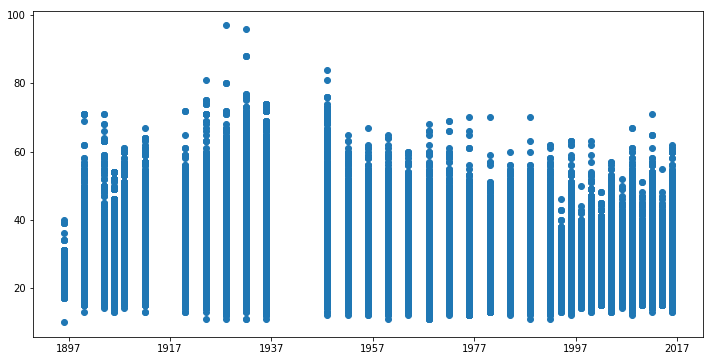

In [25]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot_date('Year', 'Age', data=oly)

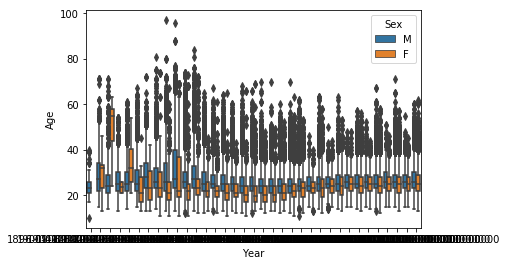

In [26]:
sns.boxplot(x='Year', y='Age', hue='Sex', data=oly)

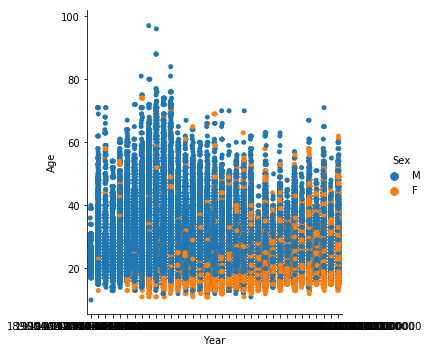

In [27]:
sns.catplot(x='Year', y='Age', hue='Sex', data=oly, kind='strip')

In [28]:
oly['year_int'] = oly['Year'].dt.year

In [29]:
oly['decade'] = oly['Year'].dt.year.round(-1)
oly['decade']

0         1990
1         2010
2         1920
3         1900
4         1990
5         1990
6         1990
7         1990
8         1990
9         1990
10        1990
11        1990
12        1990
13        1990
14        1990
15        1990
16        1990
17        1990
18        1990
19        1990
20        1990
21        1990
22        1990
23        1990
24        1990
25        1990
26        1930
27        1930
28        2000
29        1950
          ... 
271086    2010
271087    1980
271088    1980
271089    2010
271090    2010
271091    2010
271092    1990
271093    1990
271094    2000
271095    2000
271096    2000
271097    2000
271098    2010
271099    2000
271100    1930
271101    1970
271102    2000
271103    2000
271104    2000
271105    2000
271106    2000
271107    1970
271108    2000
271109    2000
271110    2020
271111    1980
271112    2010
271113    2010
271114    2000
271115    2000
Name: decade, Length: 271116, dtype: int64

In [30]:
oly.shape

(271116, 21)

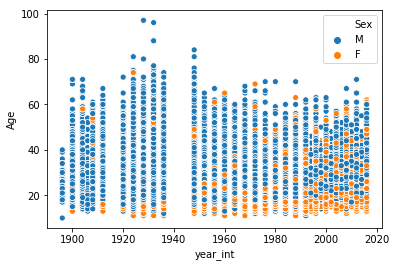

In [31]:
sns.scatterplot('year_int', 'Age', data=oly, hue='Sex')

In [32]:
oly['Gen Medal'] = oly['Sex'] + ' - ' + oly['has_medal'].map({False: 'No Medal', True: 'Medal'})

In [33]:
soly['Gen Medal'] = soly['Sex'] + ' - ' + soly['has_medal'].map({False: 'No Medal', True: 'Medal'})

In [34]:
mm = oly['Gen Medal']
mm.head(10)

0    M - No Medal
1    M - No Medal
2    M - No Medal
3       M - Medal
4    F - No Medal
5    F - No Medal
6    F - No Medal
7    F - No Medal
8    F - No Medal
9    F - No Medal
Name: Gen Medal, dtype: object

In [35]:
oly.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,Sport,Event,Medal,pre1988,has_medal,iswoman,Summer,year_int,decade,Gen Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992-01-01,...,Basketball,Basketball Men's Basketball,NaN,False,False,False,True,1992,1990,M - No Medal
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012-01-01,...,Judo,Judo Men's Extra-Lightweight,NaN,False,False,False,True,2012,2010,M - No Medal
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920-01-01,...,Football,Football Men's Football,NaN,True,False,False,True,1920,1920,M - No Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900-01-01,...,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,True,True,False,True,1900,1900,M - Medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988-01-01,...,Speed Skating,Speed Skating Women's 500 metres,NaN,False,False,True,False,1988,1990,F - No Medal
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988-01-01,...,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,False,False,True,False,1988,1990,F - No Medal
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992-01-01,...,Speed Skating,Speed Skating Women's 500 metres,NaN,False,False,True,False,1992,1990,F - No Medal
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992-01-01,...,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,False,False,True,False,1992,1990,F - No Medal
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994-01-01,...,Speed Skating,Speed Skating Women's 500 metres,NaN,False,False,True,False,1994,1990,F - No Medal
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994-01-01,...,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,False,False,True,False,1994,1990,F - No Medal


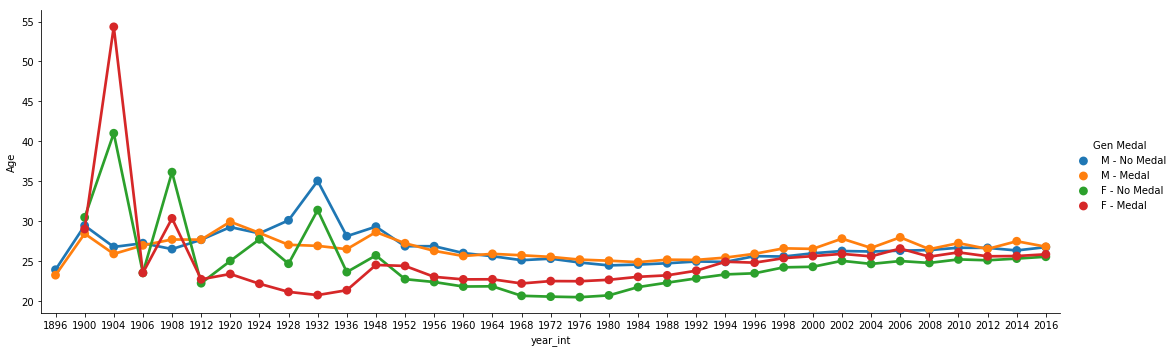

In [36]:
grid = sns.catplot('year_int', 'Age', data=oly, hue='Gen Medal', 
                   ci=None, kind='point', aspect=3)

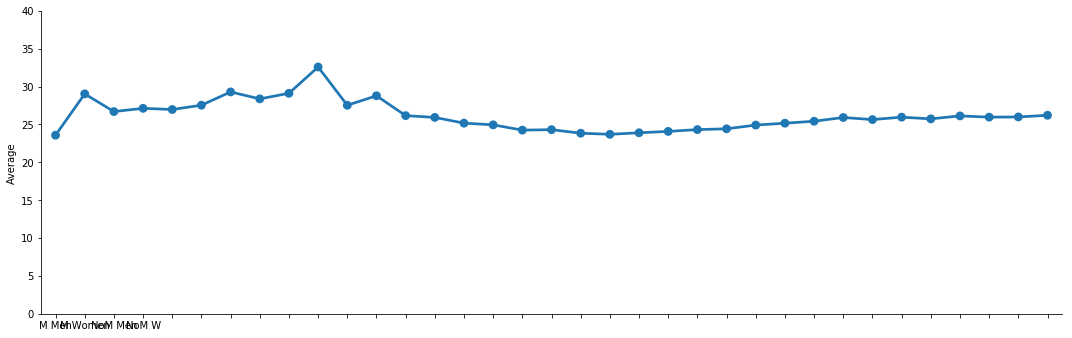

In [45]:
o = sns.catplot(x="year_int", y="Age", 
data=oly, saturation=.5,
kind="point", ci=None, aspect=3)
(o.set_axis_labels("", "Average")
 .set_xticklabels(["M Men", "M Women", "NoM Men", "NoM W"])
 .set(ylim=(0, 40)))


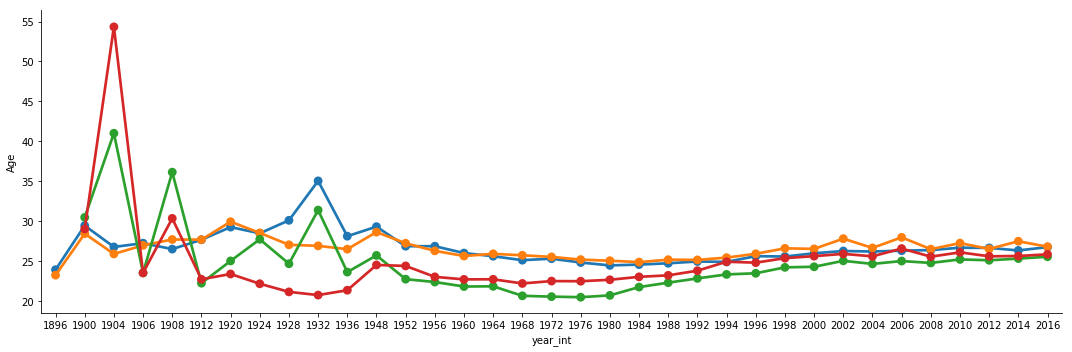

In [46]:
grid = sns.catplot('year_int', 'Age', data=oly, hue='Gen Medal', legend=False, 
                   ci=None, kind='point', aspect=3)

(15, 35)

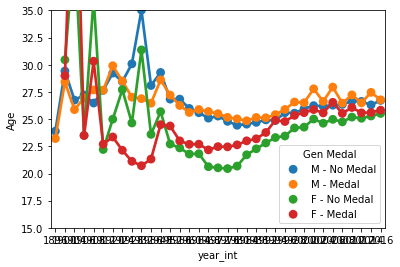

In [51]:
ax = sns.pointplot('year_int', 'Age', data=oly, hue='Gen Medal', legend=False, 
                   ci=None)
ax.set_ylim(15,35)

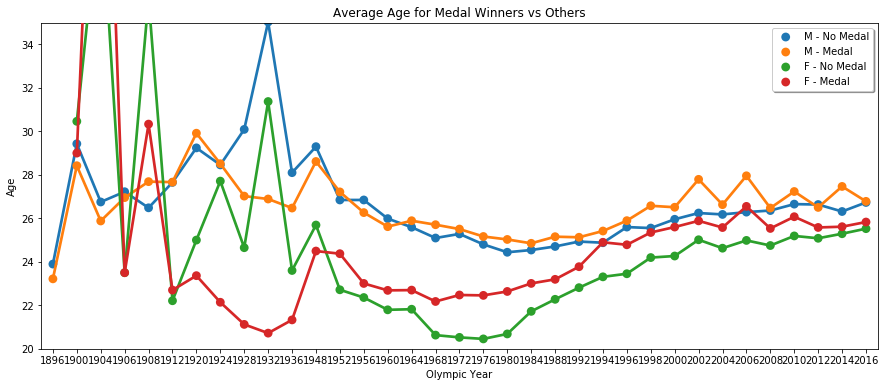

In [52]:
fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.pointplot('year_int', 'Age', data=oly, hue='Gen Medal', legend=False, row='Season',
                   ci=None)
ax.set_ylim(20,35)
ax.set_title('Average Age for Medal Winners vs Others')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.xlabel("Olympic Year")
plt.ylabel("Age")
leg = ax.legend(loc='upper right', fancybox=True, shadow=True)


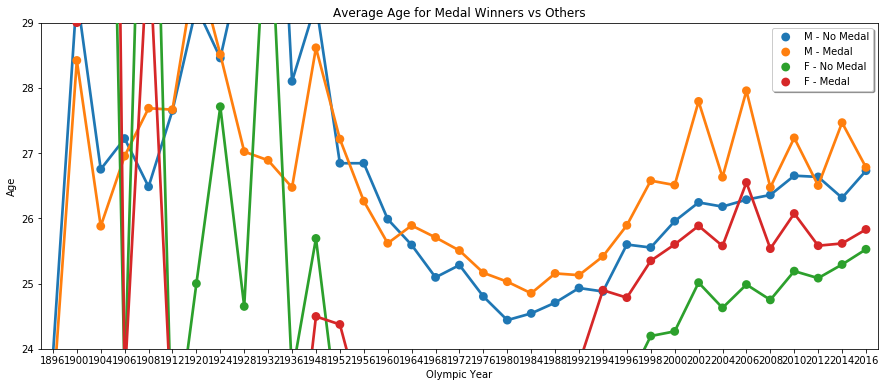

In [53]:
fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.pointplot('year_int', 'Age', data=oly, hue='Gen Medal', legend=False, row='Season',
                   ci=None)
ax.set_ylim(24,29)
ax.set_title('Average Age for Medal Winners vs Others')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.xlabel("Olympic Year")
plt.ylabel("Age")
leg = ax.legend(loc='upper right', fancybox=True, shadow=True)


ValueError: Could not interpret input 'year_int'

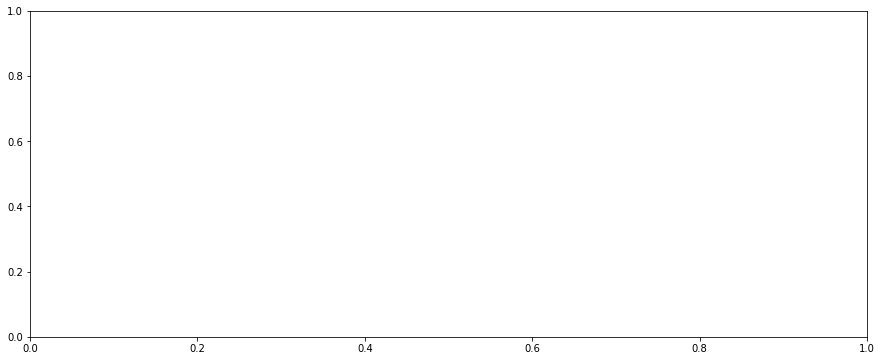

In [54]:
fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.pointplot('year_int', 'Age', data=soly, hue='Gen Medal', legend=False, row='Season',
                   ci=None)
ax.set_ylim(20,35)
ax.set_title('Average Age for Summer Medal Winners vs Others')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.xlabel("Olympic Year")
plt.ylabel("Age")
leg = ax.legend(loc='upper right', fancybox=True, shadow=True)

ValueError: Could not interpret input 'year_int'

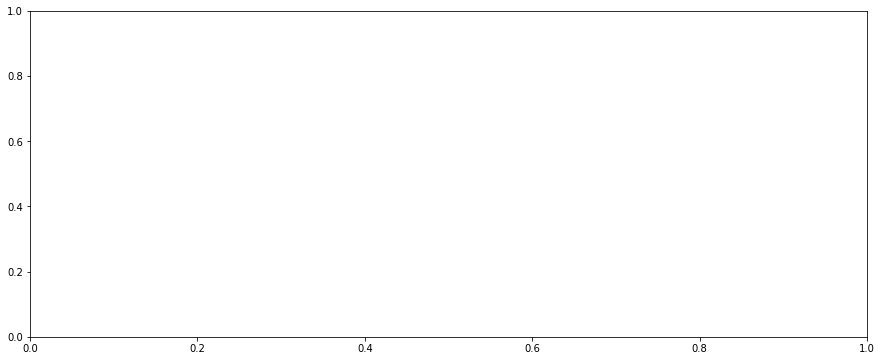

In [43]:
fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.pointplot('year_int', 'Age', data=soly, hue='Gen Medal', legend=False, 
                   ci=None)
ax.set_ylim(24,29)
ax.set_title('Average Age for Summer Medal Winners vs Others')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.xlabel("Olympic Year")
plt.ylabel("Age")
leg = ax.legend(loc='upper right', fancybox=True, shadow=True)

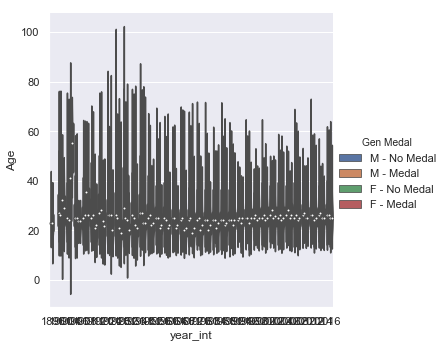

In [162]:
sns.catplot('year_int', 'Age', data=oly, hue='Gen Medal', kind="violin")


(20, 50)

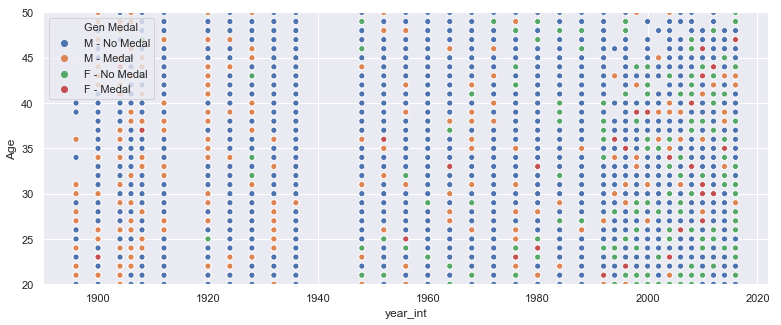

In [55]:
sns.set(rc={'figure.figsize':(13,5)})
ax = sns.scatterplot('year_int', 'Age', data=oly, hue='Gen Medal',
                   ci=None)
ax.set_ylim(20,50)


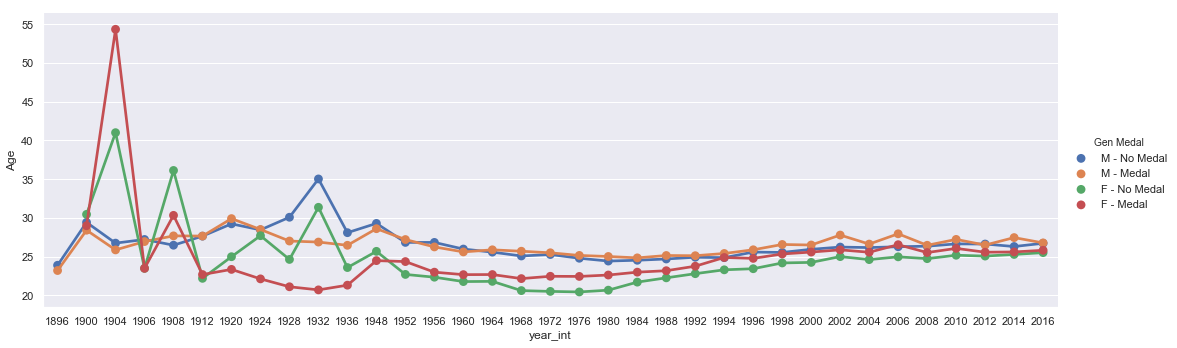

In [56]:
d = sns.catplot('year_int', 'Age', data=oly, hue='Gen Medal', 
                   ci=None, kind='point', aspect=3)


In [57]:
g = oly.groupby(['Sex'])
for group, df in g:
    print(b)

NameError: name 'b' is not defined

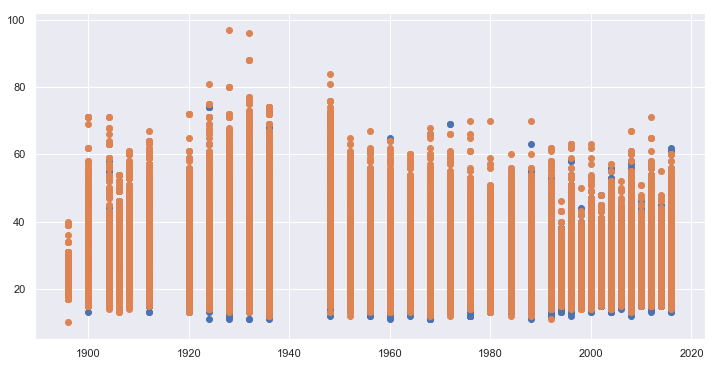

In [58]:
fig, ax = plt.subplots(figsize=(12, 6))
# ax.plot_date('Year', 'Age', data=oly, color='Sex')
for group, df in g:
    ax.scatter('year_int', 'Age', data=df)

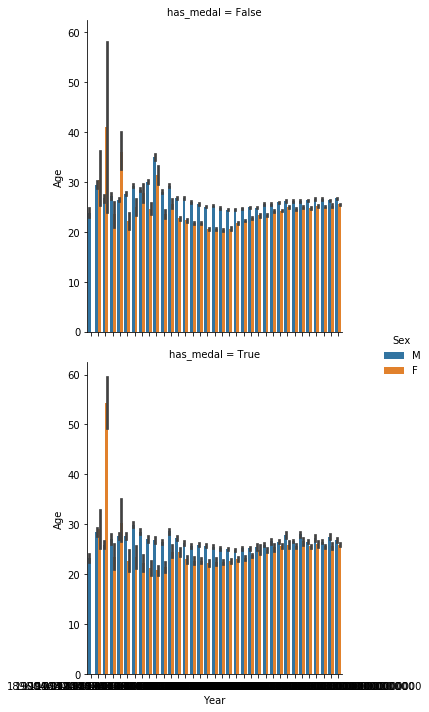

In [51]:
sns.catplot(x='Year', y='Age', hue='Sex', data=oly, kind='bar', row='has_medal')

In [53]:
sns.regplot(x='Year', y='Age', hue='Sex', data=oly, col='has_medal')

TypeError: regplot() got an unexpected keyword argument 'hue'

df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()
df.plot(legend=False)

In [48]:
pl = df.plot(x=oly["Year"], y=oly["Age"], oly["has_medal"], oly["Sex"], kind="bar")
pl

SyntaxError: positional argument follows keyword argument (<ipython-input-48-0665a4008bd6>, line 1)

AttributeError: Unknown property col1

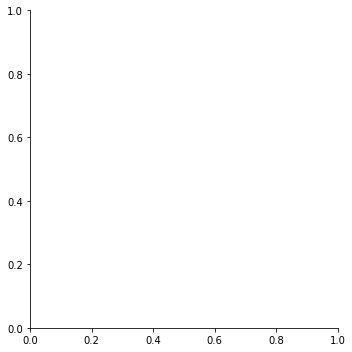

In [49]:
sns.catplot(x='Year', y='Age', data=oly, kind='bar', col1=['has_medal'], col2=['iswoman'])

In [95]:
import seaborn as sns; sns.set(color_codes=True)
import pandas as pd
x, y = pd.Series('Year', name="Year").dt.year, pd.Series('Age', name="Age")
ax = sns.regplot(x=x, y=y, marker="+")

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
>>> import seaborn as sns; sns.set(color_codes=True)
>>> tips = sns.load_dataset("tips")
>>> ax = sns.regplot(x="total_bill", y="tip", data=tips)
>>> tips["big_tip"] = (tips.tip / tips.total_bill) > .175
>>> ax = sns.regplot(x="total_bill", y="big_tip", data=tips,
...                  logistic=True, n_boot=500, y_jitter=.03)